In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

Number of points

In [2]:
size = 400

Number of Gaussians to use

In [3]:
number_of_gaussians = 2

Interval to use

In [4]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
variance_min, variance_max = 2, 30

In [5]:
lower_border, upper_border = 0., 1.

Color-Maps to use

In [6]:
brewer_color_maps =["blue", "green", "orange"]

Matplotlib

In [7]:
generate_gaussians = helper.generate_random_gaussians

In [8]:
def get_image_list(colorschemes, num = 3, borders=None, verbose=False):
    if borders is None:
        borders = [0, 1]
    z_list = generate_gaussians(num)
    z_min, z_max, z_sum = helper.generate_weights(z_list)
    img_list = []
    lower_border = borders[0]
    upper_border = borders[1]
    for z, colorscheme in zip(z_list, colorschemes):
        z_min_weight = (upper_border - lower_border) * (np.min(z) - z_min) / (z_max - z_min) + lower_border
        z_max_weight = (upper_border - lower_border) * (np.max(z) - z_min) / (z_max - z_min) + lower_border
        img, _ = picture_worker.get_colorgrid(z, **colorscheme, min_value=z_min_weight, max_value=z_max_weight, split=True,
                               verbose=verbose)
        img_list.append(img)
    return img_list, z_list, z_sum

In [9]:
brewer_dict = [k for k in color_schemes.get_colorbrewer_schemes() if k["colorscheme_name"] in brewer_color_maps]

In [10]:
img_list_brewer, z_lists, z_sum = get_image_list(brewer_dict)

In [11]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_lists)

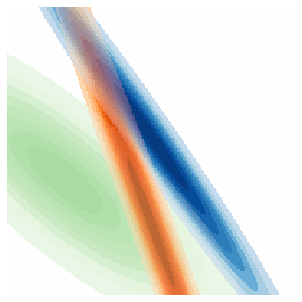

In [12]:
#displays an image
plt.imshow(mixed_matplotlib)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()